In [1]:
%run useful_functions.py

C:\Users\natha\Desktop\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\Work_Nathan\useful_functions.py:951: SyntaxWarning: invalid escape sequence '\s'
  item1A = re.sub('\s{2,}',' ', item1A)
C:\Users\natha\Desktop\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\Work_Nathan\useful_functions.py:962: SyntaxWarning: invalid escape sequence '\s'
  document = re.sub('\s{2,}',' ', document)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


update 21


In [2]:
list1=['persistence',
             'command_and_control',
             'impact',
             'initial_access',
             'resource_development',
             'collection',
             'exfiltration',
             'credential_access',
             'privilege_escalation',
             'execution',
             'defense_evasion',
             'reconnaissance',
             'lateral_movement',
             'discovery']

In [3]:
list2=['preparation_and_reconaissance','persistence_and_evasion','credential_movement','command_and_data_manipulation']

In [4]:
list3=["Overall","Sentiment"]

In [5]:
#you must have run the pipeline at least once to create the require P1 to P5 portfolios for each cyber score
def all_P1_P5_portfolio_for_all_cyberscore(include_14=True):
    dict_P1_P5={}
    
    if include_14:
        list_all_cyberscore=list3+list2+list1
    else:
        list_all_cyberscore=list3+list2

    
    for name_cyber in list_all_cyberscore:
        # Define the file path
        file_path = os.path.join("results_pipeline/", 'portfolio_returns_P1_to_P5_' + name_cyber.replace(" ", "_") + '.csv')
        
        # Check if the file already exists
        if os.path.isfile(file_path):
            
            output_portfolio_returns_P1_to_P5 = pd.read_csv(file_path)
            output_portfolio_returns_P1_to_P5.set_index('date', inplace=True)
            
        else:
            
            print("ERROR, csv don't exist!")
            return None
        output_portfolio_returns_P1_to_P5=output_portfolio_returns_P1_to_P5[23:]
        dict_P1_P5[name_cyber]=output_portfolio_returns_P1_to_P5+1

    return dict_P1_P5

In [12]:
dict_P1_P5=all_P1_P5_portfolio_for_all_cyberscore(True) #return 1+r

In [7]:
#define mkt
#define Market returns (1+r)
FF_5_factors=get_FF_5_factors()
#display(FF_5_factors)
Mkt=FF_5_factors[["Mkt-RF","RF"]].copy(deep=True)
Mkt["Mkt"]=Mkt["Mkt-RF"]+Mkt["RF"]
Mkt=Mkt[["Mkt"]]+1
Mkt=Mkt[546:-2] #stop in 2024

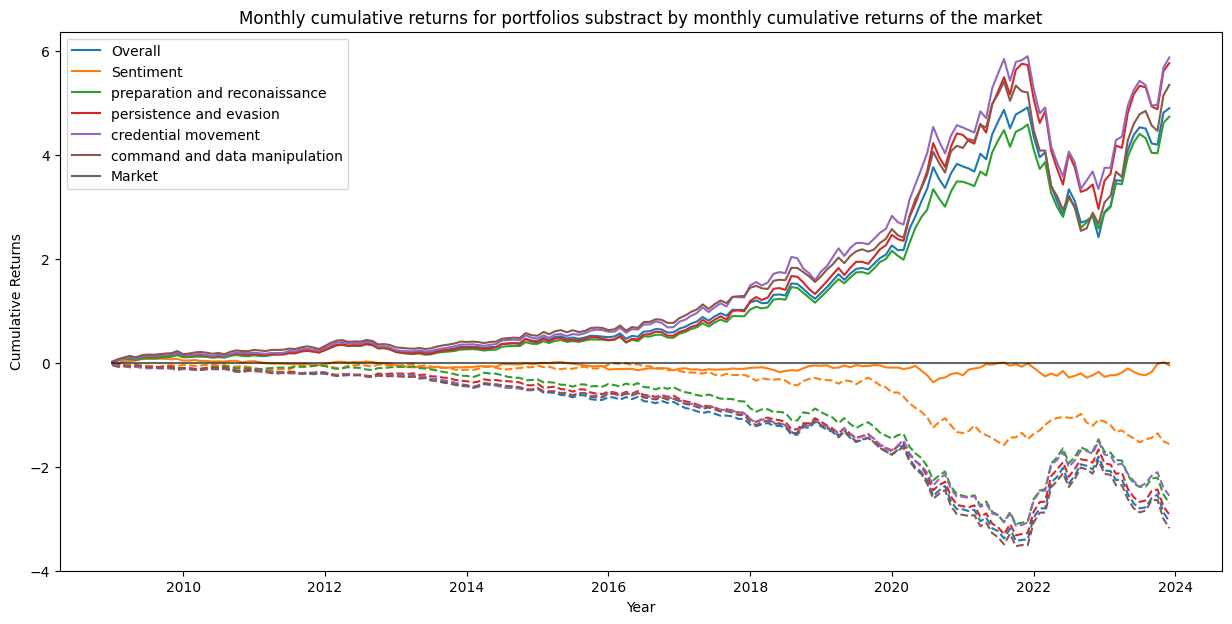

In [8]:
plt.figure(figsize = (15,7))
color_to_set = plt.get_cmap('tab10').colors
x_dates = [datetime.strptime(date_str, "%Y-%m") for date_str in dict_P1_P5["Overall"]["P5"].index]

diff=Mkt["Mkt"].cumprod()
for i,cyb in enumerate(dict_P1_P5.keys()):
    plt.plot(x_dates,dict_P1_P5[cyb]["P5"].cumprod()-diff,label=cyb.replace("_"," "),color=color_to_set[i])
    plt.plot(x_dates,dict_P1_P5[cyb]["P1"].cumprod()-diff,linestyle="--",color=color_to_set[i])

plt.plot(x_dates,Mkt["Mkt"].cumprod()-diff,color="black",label="Market",alpha=0.6)

plt.title('Monthly cumulative returns for portfolios substract by monthly cumulative returns of the market')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

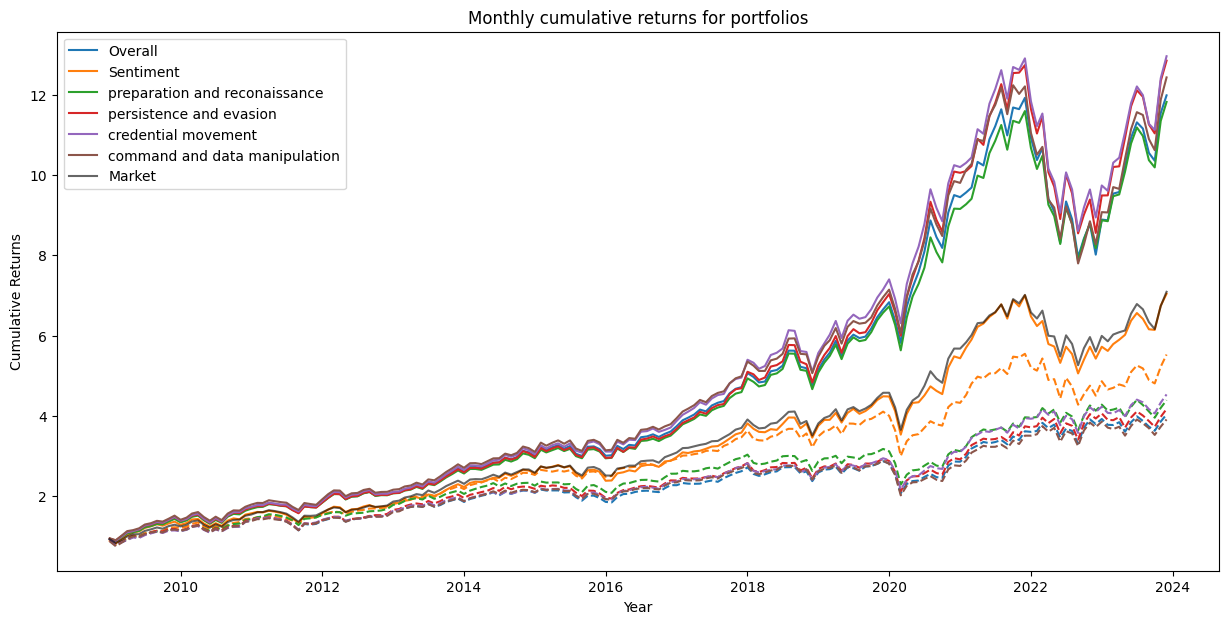

In [10]:
plt.figure(figsize = (15,7))
color_to_set = plt.get_cmap('tab10').colors
x_dates = [datetime.strptime(date_str, "%Y-%m") for date_str in dict_P1_P5["Overall"]["P5"].index]

diff=0
for i,cyb in enumerate(dict_P1_P5.keys()):
    plt.plot(x_dates,dict_P1_P5[cyb]["P5"].cumprod()-diff,label=cyb.replace("_"," "),color=color_to_set[i])
    plt.plot(x_dates,dict_P1_P5[cyb]["P1"].cumprod()-diff,linestyle="--",color=color_to_set[i])

plt.plot(x_dates,Mkt["Mkt"].cumprod()-diff,color="black",label="Market",alpha=0.6)

plt.title('Monthly cumulative returns for portfolios')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [13]:
for i,cyb in enumerate(dict_P1_P5.keys()):
    t_statistic, p_value = stats.ttest_ind(dict_P1_P5["Overall"]["P5"]-dict_P1_P5["Overall"]["P1"], dict_P1_P5[cyb]["P5"]-dict_P1_P5[cyb]["P1"])
    print("comparison between Overall and "+cyb+" : ")
    print("t-stat : ",t_statistic)
    print("p-value : ",p_value)

    print("")

comparison between Overall and Overall : 
t-stat :  0.0
p-value :  1.0

comparison between Overall and Sentiment : 
t-stat :  1.7812339834605184
p-value :  0.07572196385383605

comparison between Overall and preparation_and_reconaissance : 
t-stat :  0.15555904143195975
p-value :  0.8764682852616258

comparison between Overall and persistence_and_evasion : 
t-stat :  -0.05674439058467189
p-value :  0.9547804689975943

comparison between Overall and credential_movement : 
t-stat :  0.04978873688168655
p-value :  0.9603185081768144

comparison between Overall and command_and_data_manipulation : 
t-stat :  -0.09134940737379231
p-value :  0.9272660519306186

comparison between Overall and persistence : 
t-stat :  -0.12829446450491852
p-value :  0.8979879844763852

comparison between Overall and command_and_control : 
t-stat :  0.05968325750782242
p-value :  0.9524412083386387

comparison between Overall and impact : 
t-stat :  -0.11638017293581247
p-value :  0.9074165048578109

comparison 

In [18]:
dic_mean_res={}
for i,cyb in enumerate(dict_P1_P5.keys()):
    dic_mean_res[cyb]=np.mean(dict_P1_P5[cyb]["P5"])-1

dic_mean_res["Mkt"]=np.mean(Mkt["Mkt"])-1



In [21]:
for cyb in dic_mean_res.keys():
    print(cyb+" : ")
    print(np.round(dic_mean_res[cyb]*100,3))

Overall : 
1.509
Sentiment : 
1.204
preparation_and_reconaissance : 
1.496
persistence_and_evasion : 
1.552
credential_movement : 
1.555
command_and_data_manipulation : 
1.529
persistence : 
1.6
command_and_control : 
1.549
impact : 
1.559
initial_access : 
1.515
resource_development : 
1.432
collection : 
1.511
exfiltration : 
1.513
credential_access : 
1.588
privilege_escalation : 
1.55
execution : 
1.438
defense_evasion : 
1.523
reconnaissance : 
1.482
lateral_movement : 
1.558
discovery : 
1.479
Mkt : 
1.199
